# Comparison of forcing products

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import cosima_cookbook as cc
import dask.distributed as dsk
import glob
import matplotlib.gridspec as gs
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import matplotlib.colors as mcolors

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

clnt = dsk.Client()
clnt

<Client: 'tcp://127.0.0.1:35723' processes=7 threads=28, memory=126.00 GiB>

Bathymetry

In [2]:
session_ryf = cc.database.create_session()
experiment_ryf = '01deg_jra55v13_ryf9091'

ht = cc.querying.getvar(experiment_ryf, 'ht', session_ryf, n = 1).sel(yt_ocean = slice(None, -50))
ht = ht.interp(yt_ocean = np.flip(np.arange(-50.03, -90, -.1)))

1-km isobath

In [3]:
# Wilma's 1 km isobath
contour_file = np.load('/g/data/x77/wgh581/Post_Process/Antarctic_slope_contour_u_t_1000m_plt_approach.npz')
contour_xt_ocean = contour_file['lon_along_contour_t']
contour_yt_ocean = contour_file['lat_along_contour_t']

**JRA winds**

In [4]:
u_file_JRA = '/g/data/x77/amh157/JRA55-do/RYF/v1-3/RYF.u_10.1990_1991.nc'
u_JRA = xr.open_dataset(u_file_JRA, decode_times = False)['uas_10m'].mean('time')
v_file_JRA = '/g/data/x77/amh157/JRA55-do/RYF/v1-3/RYF.v_10.1990_1991.nc'
v_JRA = xr.open_dataset(v_file_JRA, decode_times = False)['vas_10m'].mean('time')

wind_speed_JRA = np.sqrt(u_JRA**2 + v_JRA**2)

In [5]:
# Wrap lons to avoid white line
up_JRA, lon_JRA = add_cyclic_point(u_JRA, coord=wind_speed_JRA.longitude)
vp_JRA, lon_JRA = add_cyclic_point(v_JRA, coord=wind_speed_JRA.longitude)
ws_JRA, lon_JRA = add_cyclic_point(wind_speed_JRA, coord=wind_speed_JRA.longitude)

**CORE winds**

NYF

In [6]:
# Not sure about the difference between u10 and u10mod (use u10mod as that's the only one avail for the longer time period)
u_nyf = xr.open_dataset('/g/data/v45/pas561/mom/input/cnyf/u_10.nc').U_10_MOD.mean('TIME')
v_nyf = xr.open_dataset('/g/data/v45/pas561/mom/input/cnyf/v_10.nc').V_10_MOD.mean('TIME')

In [7]:
wind_speed_nyf = np.sqrt(u_nyf**2 + v_nyf**2)

In [8]:
up_nyf, lon_nyf = add_cyclic_point(u_nyf, coord=wind_speed_nyf.LON)
vp_nyf, lon_nyf = add_cyclic_point(v_nyf, coord=wind_speed_nyf.LON)
ws_nyf, lon_nyf = add_cyclic_point(wind_speed_nyf, coord=wind_speed_nyf.LON)

IAF

In [9]:
u_CORE = xr.open_dataset('/g/data/v45/pas561/mom/input/core2iaf/u_10.1979to2007.nc').U_10_MOD.sel(TIME=slice('1990-05-01','1991-04-30')).mean('TIME')
v_CORE = xr.open_dataset('/g/data/v45/pas561/mom/input/core2iaf/v_10.1979to2007.nc').V_10_MOD.sel(TIME=slice('1990-05-01','1991-04-30')).mean('TIME')

In [10]:
wind_speed_CORE = np.sqrt(u_CORE**2 + v_CORE**2)

In [11]:
up_CORE, lon_CORE = add_cyclic_point(u_CORE, coord=wind_speed_CORE.LON)
vp_CORE, lon_CORE = add_cyclic_point(v_CORE, coord=wind_speed_CORE.LON)
ws_CORE, lon_CORE = add_cyclic_point(wind_speed_CORE, coord=wind_speed_CORE.LON)

**ERA5 winds**

If already saved post-processed data, load here, otherwise run cells further down first.

In [12]:
u_ERA5 = xr.open_dataarray('/g/data/x77/wgh581/Post_Process/Reanalysis/u10n_ERA5_SH.nc').mean('time')
v_ERA5 = xr.open_dataarray('/g/data/x77/wgh581/Post_Process/Reanalysis/v10n_ERA5_SH.nc').mean('time')

In [13]:
wind_speed_ERA5 = np.sqrt(u_ERA5**2 + v_ERA5**2)

In [14]:
up_ERA5, lon_ERA5 = add_cyclic_point(u_ERA5, coord=wind_speed_ERA5.longitude)
vp_ERA5, lon_ERA5 = add_cyclic_point(v_ERA5, coord=wind_speed_ERA5.longitude)
ws_ERA5, lon_ERA5 = add_cyclic_point(wind_speed_ERA5, coord=wind_speed_ERA5.longitude)

---

Calculate and save ERA5 for May 1990 - Apr 1991

In [19]:
# u wind
# data is actually under rt52, make sure you have access to the project
u1  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1990/u10n_era5_oper_sfc_19900501-19900531.nc').sel(latitude=slice(-50,-90))
u2  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1990/u10n_era5_oper_sfc_19900601-19900630.nc').sel(latitude=slice(-50,-90))
u3  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1990/u10n_era5_oper_sfc_19900701-19900731.nc').sel(latitude=slice(-50,-90))
u4  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1990/u10n_era5_oper_sfc_19900801-19900831.nc').sel(latitude=slice(-50,-90))
u5  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1990/u10n_era5_oper_sfc_19900901-19900930.nc').sel(latitude=slice(-50,-90))
u6  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1990/u10n_era5_oper_sfc_19901001-19901031.nc').sel(latitude=slice(-50,-90))
u7  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1990/u10n_era5_oper_sfc_19901101-19901130.nc').sel(latitude=slice(-50,-90))
u8  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1990/u10n_era5_oper_sfc_19901201-19901231.nc').sel(latitude=slice(-50,-90))
u9  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1991/u10n_era5_oper_sfc_19910101-19910131.nc').sel(latitude=slice(-50,-90))
u10 = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1991/u10n_era5_oper_sfc_19910201-19910228.nc').sel(latitude=slice(-50,-90))
u11 = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1991/u10n_era5_oper_sfc_19910301-19910331.nc').sel(latitude=slice(-50,-90))
u12 = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/u10n/1991/u10n_era5_oper_sfc_19910401-19910430.nc').sel(latitude=slice(-50,-90))

In [20]:
u_ERA5 = xr.concat([u1, u2, u3, u4, u5, u6, u7, u8, u9, u10, u11, u12], dim='time')

In [21]:
u_ERA5.to_netcdf('/g/data/x77/wgh581/Post_Process/Reanalysis/u10n_ERA5_SH.nc')

In [26]:
# v wind
# data is actually under rt52, make sure you have access to the project
v1  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1990/v10n_era5_oper_sfc_19900501-19900531.nc').sel(latitude=slice(-50,-90))
v2  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1990/v10n_era5_oper_sfc_19900601-19900630.nc').sel(latitude=slice(-50,-90))
v3  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1990/v10n_era5_oper_sfc_19900701-19900731.nc').sel(latitude=slice(-50,-90))
v4  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1990/v10n_era5_oper_sfc_19900801-19900831.nc').sel(latitude=slice(-50,-90))
v5  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1990/v10n_era5_oper_sfc_19900901-19900930.nc').sel(latitude=slice(-50,-90))
v6  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1990/v10n_era5_oper_sfc_19901001-19901031.nc').sel(latitude=slice(-50,-90))
v7  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1990/v10n_era5_oper_sfc_19901101-19901130.nc').sel(latitude=slice(-50,-90))
v8  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1990/v10n_era5_oper_sfc_19901201-19901231.nc').sel(latitude=slice(-50,-90))
v9  = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1991/v10n_era5_oper_sfc_19910101-19910131.nc').sel(latitude=slice(-50,-90))
v10 = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1991/v10n_era5_oper_sfc_19910201-19910228.nc').sel(latitude=slice(-50,-90))
v11 = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1991/v10n_era5_oper_sfc_19910301-19910331.nc').sel(latitude=slice(-50,-90))
v12 = xr.open_dataarray('/g/data/ik11/inputs/ERA5/single-levels/reanalysis/v10n/1991/v10n_era5_oper_sfc_19910401-19910430.nc').sel(latitude=slice(-50,-90))

In [27]:
v_ERA5 = xr.concat([v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12], dim='time')

In [28]:
v_ERA5.to_netcdf('/g/data/x77/wgh581/Post_Process/Reanalysis/v10n_ERA5_SH.nc')

---

**CM2-025 winds**

In [15]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'

In [ ]:
start_time = '0490-01-01'
end_time   = '0499-12-31'
u_CM2_025 = cc.querying.getvar(expt_CM2_025, 'fld_s03i209', session_CM2, start_time=start_time, end_time=end_time)
v_CM2_025 = cc.querying.getvar(expt_CM2_025, 'fld_s03i210', session_CM2, start_time=start_time, end_time=end_time)

In [17]:
u_CM2_025 = u_CM2_025.sel(time=slice(start_time, end_time)).mean('time')
v_CM2_025 = v_CM2_025.sel(time=slice(start_time, end_time)).mean('time')

In [ ]:
# Velocity is on a C-grid. Use xgcm to deal with coordinates. 

In [18]:
# Create grid
import xgcm
ds = xr.Dataset(coords={"lon": (["lon"], v_CM2_025.lon.values, {"axis": "X"},),
                        "lon_u": (["lon_u"], u_CM2_025.lon_u.values, {"axis": "X", "c_grid_axis_shift": -0.5},),
                        "lat": (["lat"], u_CM2_025.lat.values, {"axis": "Y"},),
                        "lat_v": (["lat_v"], v_CM2_025.lat_v.values, {"axis": "Y", "c_grid_axis_shift": -0.5},),
                       })

grid = xgcm.Grid(ds)

In [19]:
# Interpolate onto common axes, select SO
u_CM2_025_int = grid.interp(u_CM2_025, axis="X").sel(lat=slice(-90,-50))
v_CM2_025_int = grid.interp(v_CM2_025, axis="Y").sel(lat=slice(-90,-50))

In [20]:
wind_speed_CM2_025 = np.sqrt(u_CM2_025_int**2 + v_CM2_025_int**2)

In [21]:
up_CM2_025, lon_CM2_025 = add_cyclic_point(u_CM2_025_int, coord=wind_speed_CM2_025.lon)
vp_CM2_025, lon_CM2_025 = add_cyclic_point(v_CM2_025_int, coord=wind_speed_CM2_025.lon)
ws_CM2_025, lon_CM2_025 = add_cyclic_point(wind_speed_CM2_025, coord=wind_speed_CM2_025.lon)

### Plotting

In [22]:
fig_path = '/g/data/x77/wgh581/Figures/Figures_DSW_ACCESSOM201/'

In [23]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [24]:
def figure_1():
    fig = plt.figure(figsize = (20, 18))
    gr = gs.GridSpec(2, 2, figure = fig, wspace = -.05, hspace = 0.15); 
    axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
           fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo()),
           fig.add_subplot(gr[1,0], projection = ccrs.SouthPolarStereo()),
           fig.add_subplot(gr[1,1], projection = ccrs.SouthPolarStereo())]
    for ax, lb in zip(axs, ['a) JRA55-do', 'b) CORE', 'c) ERA5', 'd) CM2-025']):
        ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
        ax.spines['geo']
        ax.text(-0.03, .975, lb, transform=ax.transAxes, size=24, weight='bold')
        ax.patch.set_alpha(0)
        ax.set_boundary(circle, transform=ax.transAxes)
        ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())
    return fig, axs

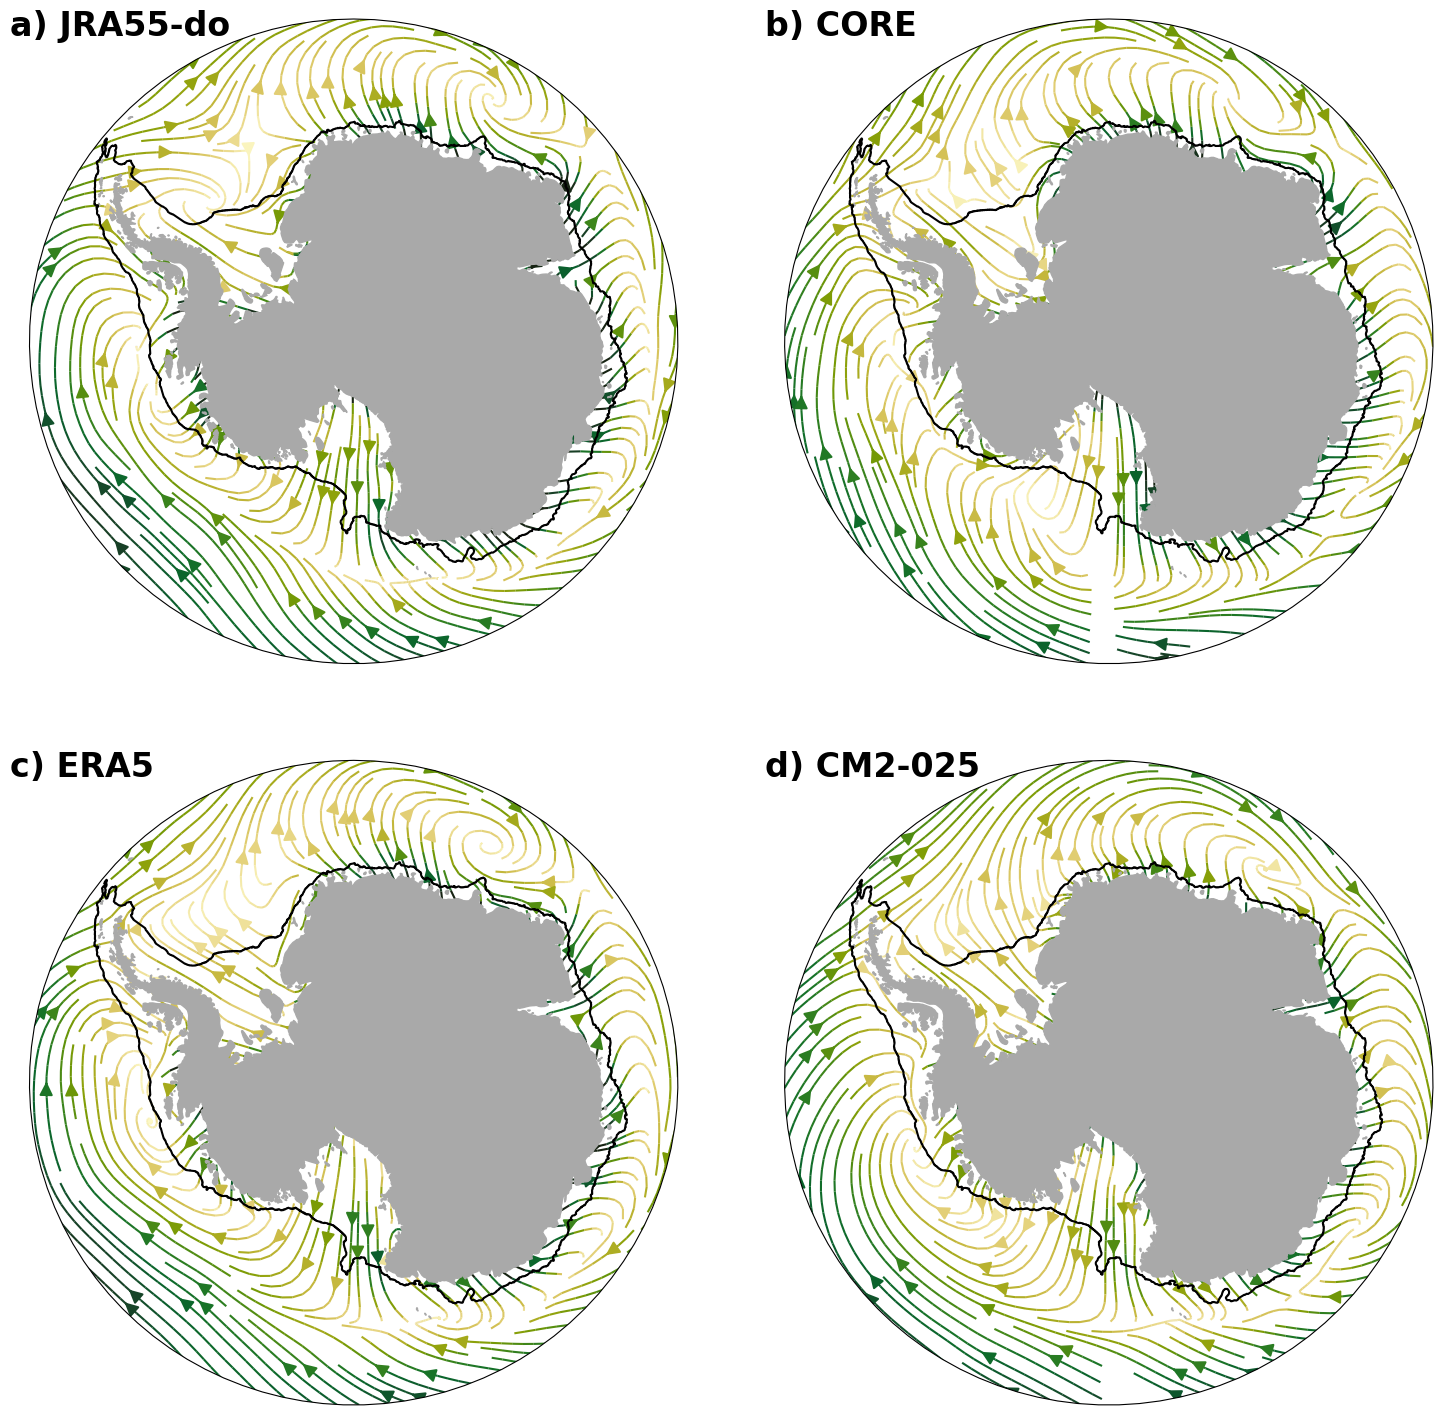

In [98]:
font_size = 24
plt.rcParams['font.size'] = 20

fig, axs = figure_1()

# JRA55
c = axs[0].streamplot(lon_JRA, u_JRA['latitude'], up_JRA, vp_JRA, color=ws_JRA, norm=mcolors.Normalize(vmin=0, vmax=8, clip=True),
                      density=2, arrowsize=2, cmap=cmocean.cm.speed, transform=ccrs.PlateCarree(), zorder=0)

# CORE
c = axs[1].streamplot(lon_nyf, u_nyf['LAT'], up_nyf, vp_nyf, color=ws_nyf, norm=mcolors.Normalize(vmin=0, vmax=8, clip=True),
                      density=2, arrowsize=2, cmap=cmocean.cm.speed, transform=ccrs.PlateCarree(), zorder=0)

# ERA5
c = axs[2].streamplot(lon_ERA5, u_ERA5['latitude'], up_ERA5, vp_ERA5, color=ws_ERA5, norm=mcolors.Normalize(vmin=0, vmax=8, clip=True),
                      density=2, arrowsize=2, cmap=cmocean.cm.speed, transform=ccrs.PlateCarree(), zorder=0)

# CM2-025
c = axs[3].streamplot(lon_CM2_025, u_CM2_025_int['lat'], up_CM2_025, vp_CM2_025, color=ws_CM2_025, norm=mcolors.Normalize(vmin=0, vmax=8, clip=True),
                      density=2, arrowsize=2, cmap=cmocean.cm.speed, transform=ccrs.PlateCarree(), zorder=0)

# cbar_ax  = fig.add_axes([0.85, 0.4, 0.015, 0.2])
# cbar = plt.colorbar(c, cax=cbar_ax, label='10 m wind speed (ms$^{-1}$)', extend='max', ticks=np.arange(0,8)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_products_SO_streamplot.png'
    plt.savefig(fig_path + fig_name, dpi=300);

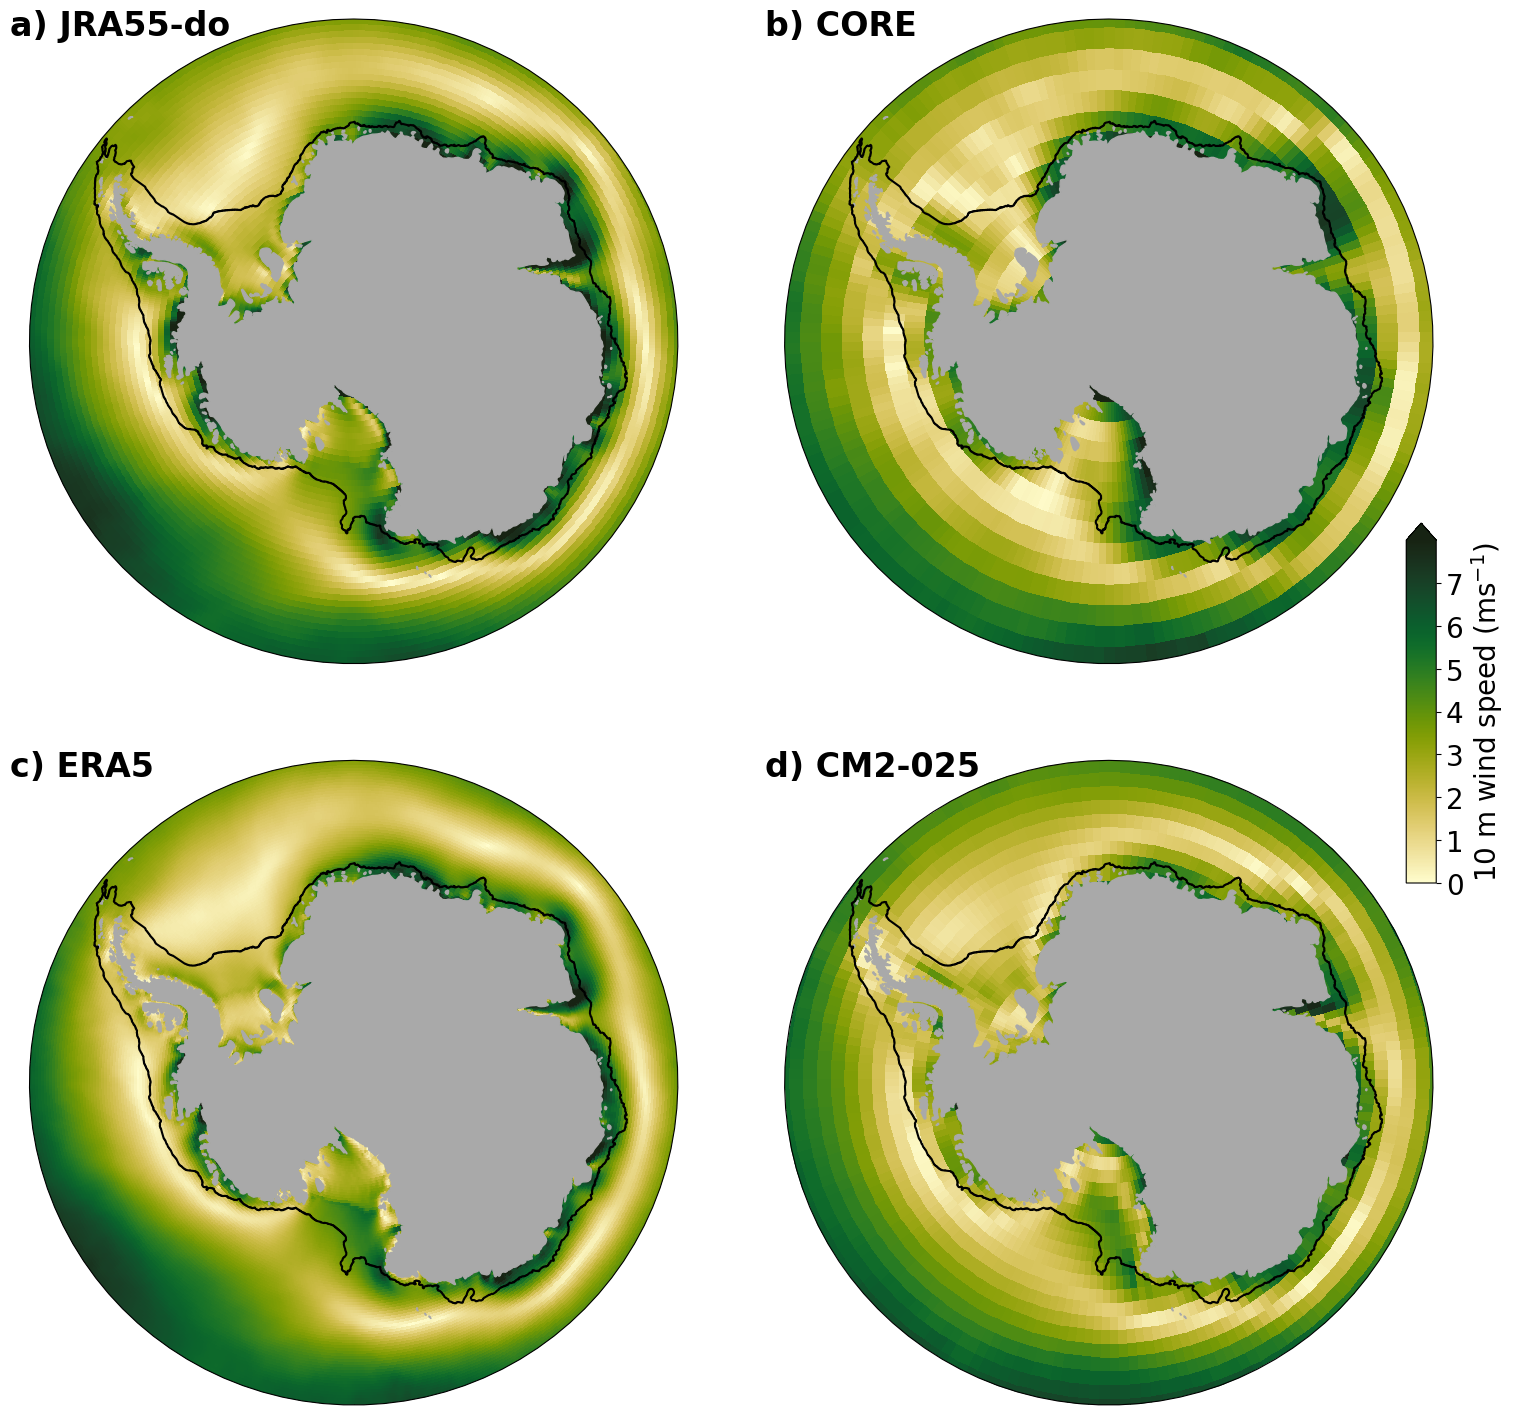

In [99]:
fig, axs = figure_1()

c = axs[0].pcolormesh(lon_JRA, u_JRA['latitude'], ws_JRA, transform=ccrs.PlateCarree(), cmap=cmocean.cm.speed, vmin=0, vmax=8, zorder=0)

axs[1].pcolormesh(lon_nyf, u_nyf['LAT'], ws_nyf, transform=ccrs.PlateCarree(), cmap=cmocean.cm.speed, vmin=0, vmax=8, zorder=0)

axs[2].pcolormesh(lon_ERA5, u_ERA5['latitude'], ws_ERA5, transform=ccrs.PlateCarree(), cmap=cmocean.cm.speed, vmin=0, vmax=8, zorder=0)

axs[3].pcolormesh(lon_CM2_025, u_CM2_025_int['lat'], ws_CM2_025, transform=ccrs.PlateCarree(), cmap=cmocean.cm.speed, vmin=0, vmax=8, zorder=0)

cbar_ax  = fig.add_axes([0.85, 0.4, 0.015, 0.2])
cbar = plt.colorbar(c, cax=cbar_ax, label='10 m wind speed (ms$^{-1}$)', extend='max', ticks=np.arange(0,8)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_products_SO_pcolormesh.png'
    plt.savefig(fig_path + fig_name, dpi=300);

**Difference between CORE forcing (nyf and 1990-1991)**

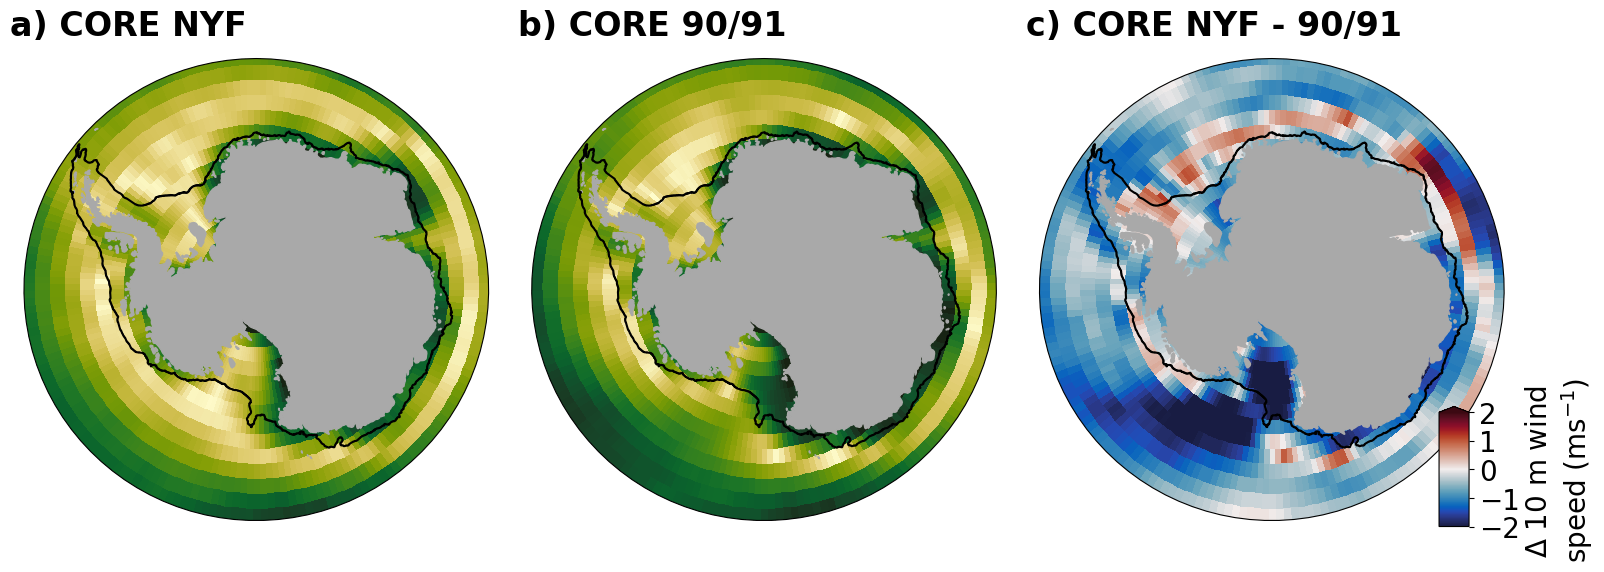

In [100]:
fig = plt.figure(figsize=(20, 6))
gr  = gs.GridSpec(1, 3, figure=fig, wspace=-.05, hspace=0.15); 
axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,2], projection = ccrs.SouthPolarStereo())]
for ax, lb in zip(axs, ['a) CORE NYF', 'b) CORE 90/91', 'c) CORE NYF - 90/91']):
    ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
    ax.spines['geo']
    ax.text(-0.03, 1.05, lb, transform=ax.transAxes, size=24, weight='bold')
    ax.patch.set_alpha(0)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())

axs[0].pcolormesh(lon_nyf, u_nyf['LAT'], ws_nyf, transform=ccrs.PlateCarree(), cmap=cmocean.cm.speed, vmin=0, vmax=8, zorder=0)
axs[1].pcolormesh(lon_CORE, u_CORE['LAT'], ws_CORE, transform=ccrs.PlateCarree(), cmap=cmocean.cm.speed, vmin=0, vmax=8, zorder=0)
c = axs[2].pcolormesh(lon_CORE, u_CORE['LAT'], ws_nyf-ws_CORE, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-2, vmax=2, zorder=0)

cbar_ax  = fig.add_axes([0.85, 0.1, 0.015, 0.2])
cbar = plt.colorbar(c, cax=cbar_ax, label='$\Delta$ 10 m wind \nspeed (ms$^{-1}$)', extend='max', ticks=np.arange(-2,4,1)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_products_SO_CORE_comparison.png'
    plt.savefig(fig_path + fig_name, dpi=300);

**Variability in coupled model winds**

In [ ]:
# Load in 10 yr to check for std
start_time = '0490-01-01'
end_time   = '0499-12-31'
u_CM2_025_10yr = cc.querying.getvar(expt_CM2_025, 'fld_s03i209', session_CM2, start_time=start_time, end_time=end_time)
v_CM2_025_10yr = cc.querying.getvar(expt_CM2_025, 'fld_s03i210', session_CM2, start_time=start_time, end_time=end_time)

In [29]:
# Interpolate onto common axes, select SO
u_CM2_025_10yr = grid.interp(u_CM2_025_10yr, axis="X").sel(lat=slice(-90,-50))
v_CM2_025_10yr = grid.interp(v_CM2_025_10yr, axis="Y").sel(lat=slice(-90,-50))

In [30]:
wind_speed_CM2_025_10yr = np.sqrt(u_CM2_025_10yr**2 + u_CM2_025_10yr**2)

In [ ]:
up_CM2_025_10yr, lon_CM2_025 = add_cyclic_point(u_CM2_025_10yr, coord=wind_speed_CM2_025_10yr.lon)
vp_CM2_025_10yr, lon_CM2_025 = add_cyclic_point(u_CM2_025_10yr, coord=wind_speed_CM2_025_10yr.lon)

In [ ]:
ws_CM2_025_10yr_mean, lon_CM2_025 = add_cyclic_point(wind_speed_CM2_025_10yr.mean('time'), coord=wind_speed_CM2_025_10yr.lon)
ws_CM2_025_10yr_std, lon_CM2_025 = add_cyclic_point(wind_speed_CM2_025_10yr.std('time'), coord=wind_speed_CM2_025_10yr.lon)

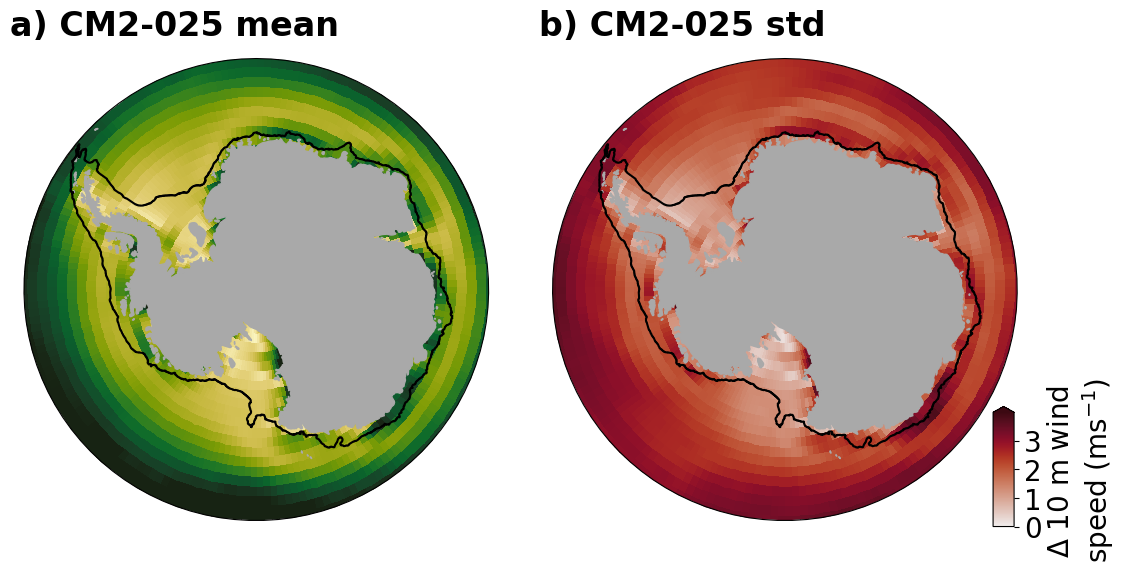

In [44]:
font_size = 24
plt.rcParams['font.size'] = 20

fig = plt.figure(figsize=(14, 6))
gr  = gs.GridSpec(1, 2, figure=fig, wspace=-.05, hspace=0.15); 
axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo())]
for ax, lb in zip(axs, ['a) CM2-025 mean', 'b) CM2-025 std']):
    ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
    ax.spines['geo']
    ax.text(-0.03, 1.05, lb, transform=ax.transAxes, size=24, weight='bold')
    ax.patch.set_alpha(0)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())

axs[0].pcolormesh(lon_CM2_025, u_CM2_025_int['lat'], ws_CM2_025_10yr_mean, transform=ccrs.PlateCarree(), cmap=cmocean.cm.speed, vmin=0, vmax=8, zorder=0)
c = axs[1].pcolormesh(lon_CM2_025, u_CM2_025_int['lat'], ws_CM2_025_10yr_std, transform=ccrs.PlateCarree(), cmap=cmocean.cm.amp, vmin=-0, vmax=4, zorder=0)

cbar_ax  = fig.add_axes([0.85, 0.1, 0.015, 0.2])
cbar = plt.colorbar(c, cax=cbar_ax, label='$\Delta$ 10 m wind \nspeed (ms$^{-1}$)', extend='max', ticks=np.arange(0,4,1)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_products_SO_CM2025_mean_std.png'
    plt.savefig(fig_path + fig_name, dpi=300);

### Interpolate onto same grid to plot anomalies

Interpolate onto CM2 grid, difference from JRA and CORE.

In [25]:
import xesmf as xe

In [34]:
wind_speed_CM2_025 = wind_speed_CM2_025.load()

JRA - interpolate onto CM2 grid

In [32]:
# Select Southern Ocean
wind_speed_JRA_SO = wind_speed_JRA.sel(latitude=slice(-90,-50))
# Rename coordinate to match CM2-025
wind_speed_JRA_SO = wind_speed_JRA_SO.rename(({'longitude':'lon', 'latitude':'lat'}))

In [35]:
regridder_JRA = xe.Regridder(wind_speed_JRA_SO, wind_speed_CM2_025, method='bilinear', periodic=True)

In [36]:
wind_speed_JRA_interp = regridder_JRA(wind_speed_JRA_SO)

In [69]:
u_CM2_025_int = u_CM2_025_int.load()

In [70]:
# u component
u_JRA_SO = u_JRA.sel(latitude=slice(-90,-50))
u_JRA_SO = u_JRA_SO.rename(({'longitude':'lon', 'latitude':'lat'}))
regridder_JRA_u = xe.Regridder(u_JRA_SO, u_CM2_025_int, method='bilinear', periodic=True)
u_JRA_interp = regridder_JRA_u(u_JRA_SO)

In [71]:
v_CM2_025_int = v_CM2_025_int.load()

In [72]:
# v component
v_JRA_SO = v_JRA.sel(latitude=slice(-90,-50))
v_JRA_SO = v_JRA_SO.rename(({'longitude':'lon', 'latitude':'lat'}))
regridder_JRA_v = xe.Regridder(v_JRA_SO, v_CM2_025_int, method='bilinear', periodic=True)
v_JRA_interp = regridder_JRA_v(v_JRA_SO)

CORE - interoplate onto CM2 grid

In [37]:
wind_speed_nyf_SO = wind_speed_nyf.rename(({'LON':'lon', 'LAT':'lat'}))

In [38]:
regridder_CORE = xe.Regridder(wind_speed_nyf_SO, wind_speed_CM2_025, method='bilinear', periodic=True)

In [39]:
wind_speed_nyf_interp = regridder_CORE(wind_speed_nyf_SO)

In [73]:
# u component
u_nyf_rgd = u_nyf.rename(({'LON':'lon', 'LAT':'lat'}))
regridder_CORE_u = xe.Regridder(u_nyf_rgd, u_CM2_025_int, method='bilinear', periodic=True)
u_nyf_interp = regridder_CORE_u(u_nyf_rgd)

In [96]:
# v component
v_nyf_rgd = v_nyf.rename(({'LON':'lon', 'LAT':'lat'}))
regridder_CORE_v = xe.Regridder(v_nyf_rgd, v_CM2_025_int, method='bilinear', periodic=True)
v_nyf_interp = regridder_CORE_v(v_nyf_rgd)

Prep data

In [56]:
# Add cyclic point
ws_JRA_interp, lon_CM2_025 = add_cyclic_point(wind_speed_JRA_interp, coord=wind_speed_JRA_interp.lon)
ws_nyf_interp, lon_CM2_025 = add_cyclic_point(wind_speed_nyf_interp, coord=wind_speed_nyf_interp.lon)

In [75]:
# # Add cyclic point
# U_JRA_interp, lon_CM2_025 = add_cyclic_point(u_JRA_interp, coord=u_JRA_interp.lon)
# U_nyf_interp, lon_CM2_025 = add_cyclic_point(u_nyf_interp, coord=u_nyf_interp.lon)

In [97]:
# # Add cyclic point
# V_JRA_interp, lon_CM2_025 = add_cyclic_point(v_JRA_interp, coord=v_JRA_interp.lon)
# V_nyf_interp, lon_CM2_025 = add_cyclic_point(v_nyf_interp, coord=v_nyf_interp.lon)

Plotting

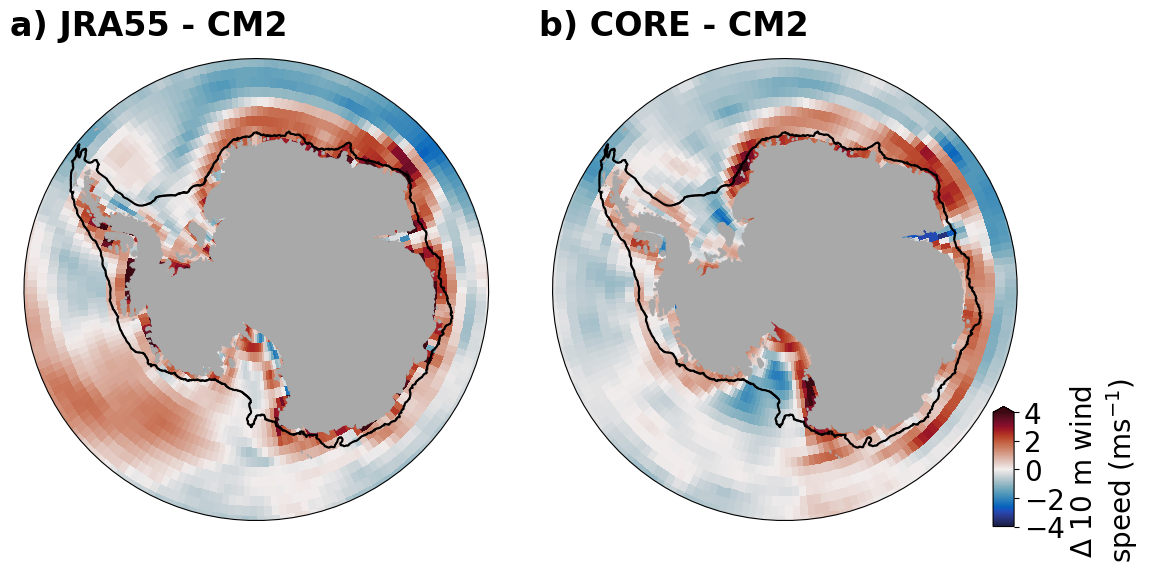

In [65]:
font_size = 24
plt.rcParams['font.size'] = 20

fig = plt.figure(figsize=(14, 6))
gr  = gs.GridSpec(1, 2, figure=fig, wspace=-.05, hspace=0.15); 
axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo())]
for ax, lb in zip(axs, ['a) JRA55 - CM2', 'b) CORE - CM2']):
    ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
    ax.spines['geo']
    ax.text(-0.03, 1.05, lb, transform=ax.transAxes, size=24, weight='bold')
    ax.patch.set_alpha(0)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())

axs[0].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], (ws_JRA_interp - ws_CM2_025), transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-4, vmax=4, zorder=0)
c = axs[1].pcolormesh(lon_CM2_025, wind_speed_nyf_interp['lat'], (ws_nyf_interp - ws_CM2_025), transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-4, vmax=4, zorder=0)

cbar_ax  = fig.add_axes([0.85, 0.1, 0.015, 0.2])
cbar = plt.colorbar(c, cax=cbar_ax, label='$\Delta$ 10 m wind \nspeed (ms$^{-1}$)', extend='max', ticks=np.arange(-4,5,2)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_products_SO_CM2025_anomalies.png'
    plt.savefig(fig_path + fig_name, dpi=300);

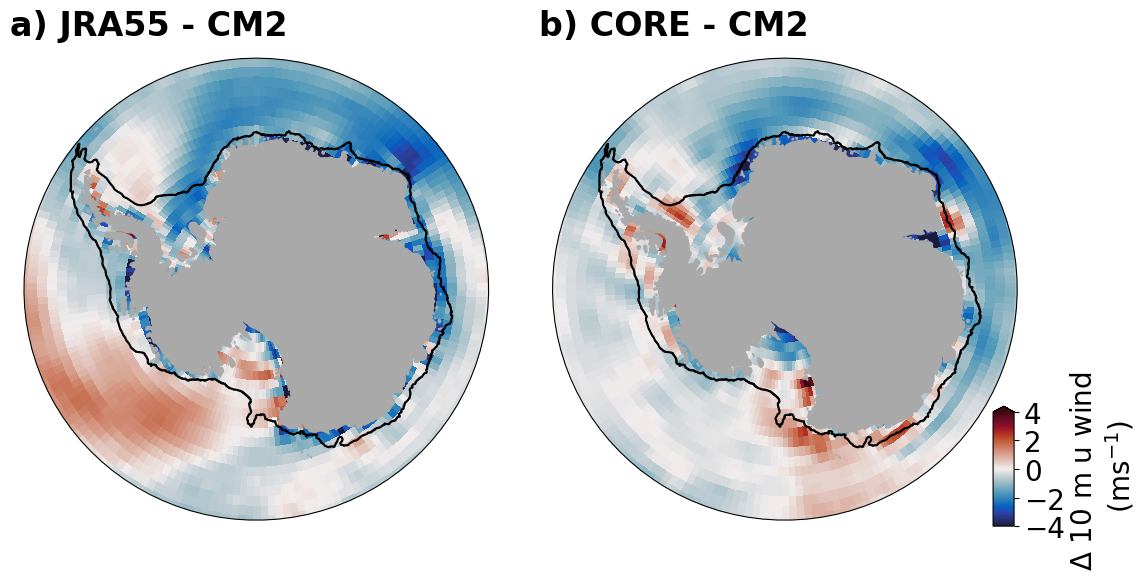

In [98]:
font_size = 24
plt.rcParams['font.size'] = 20

fig = plt.figure(figsize=(14, 6))
gr  = gs.GridSpec(1, 2, figure=fig, wspace=-.05, hspace=0.15); 
axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo())]
for ax, lb in zip(axs, ['a) JRA55 - CM2', 'b) CORE - CM2']):
    ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
    ax.spines['geo']
    ax.text(-0.03, 1.05, lb, transform=ax.transAxes, size=24, weight='bold')
    ax.patch.set_alpha(0)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())

axs[0].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], (u_JRA_interp - u_CM2_025_int), transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-4, vmax=4, zorder=0)
c = axs[1].pcolormesh(lon_CM2_025, wind_speed_nyf_interp['lat'], (u_nyf_interp - u_CM2_025_int), transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-4, vmax=4, zorder=0)

cbar_ax  = fig.add_axes([0.85, 0.1, 0.015, 0.2])
cbar = plt.colorbar(c, cax=cbar_ax, label='$\Delta$ 10 m u wind \n (ms$^{-1}$)', extend='max', ticks=np.arange(-4,5,2)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_u_wind_products_SO_CM2025_anomalies.png'
    plt.savefig(fig_path + fig_name, dpi=300);

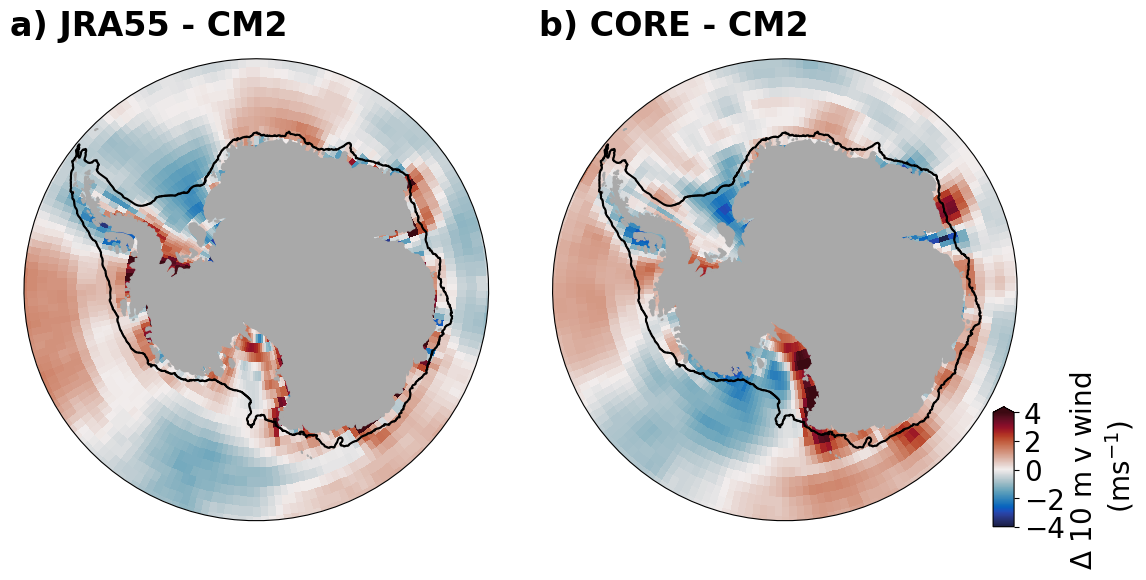

In [99]:
font_size = 24
plt.rcParams['font.size'] = 20

fig = plt.figure(figsize=(14, 6))
gr  = gs.GridSpec(1, 2, figure=fig, wspace=-.05, hspace=0.15); 
axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo())]
for ax, lb in zip(axs, ['a) JRA55 - CM2', 'b) CORE - CM2']):
    ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
    ax.spines['geo']
    ax.text(-0.03, 1.05, lb, transform=ax.transAxes, size=24, weight='bold')
    ax.patch.set_alpha(0)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())

axs[0].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], (v_JRA_interp - v_CM2_025_int), transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-4, vmax=4, zorder=0)
c = axs[1].pcolormesh(lon_CM2_025, wind_speed_nyf_interp['lat'], (v_nyf_interp - v_CM2_025_int), transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-4, vmax=4, zorder=0)

cbar_ax  = fig.add_axes([0.85, 0.1, 0.015, 0.2])
cbar = plt.colorbar(c, cax=cbar_ax, label='$\Delta$ 10 m v wind \n (ms$^{-1}$)', extend='max', ticks=np.arange(-4,5,2)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_v_wind_products_SO_CM2025_anomalies.png'
    plt.savefig(fig_path + fig_name, dpi=300);

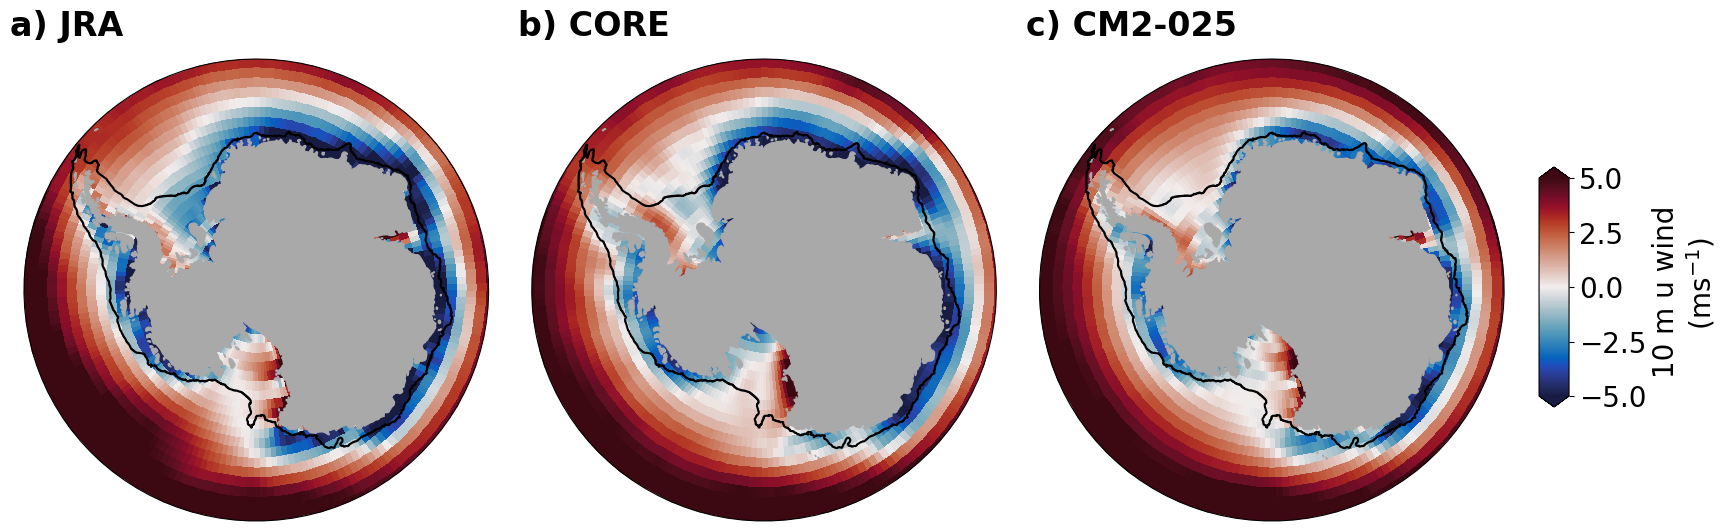

In [100]:
fig = plt.figure(figsize=(20, 6))
gr  = gs.GridSpec(1, 3, figure=fig, wspace=-.05, hspace=0.15); 
axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,2], projection = ccrs.SouthPolarStereo())]
for ax, lb in zip(axs, ['a) JRA', 'b) CORE', 'c) CM2-025']):
    ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
    ax.spines['geo']
    ax.text(-0.03, 1.05, lb, transform=ax.transAxes, size=24, weight='bold')
    ax.patch.set_alpha(0)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())

axs[0].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], u_JRA_interp, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-5, vmax=5, zorder=0)
axs[1].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], u_nyf_interp, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-5, vmax=5, zorder=0)
c = axs[2].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], u_CM2_025_int, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-5, vmax=5, zorder=0)

cbar_ax  = fig.add_axes([0.9, 0.3, 0.015, 0.4])
cbar = plt.colorbar(c, cax=cbar_ax, label='10 m u wind \n (ms$^{-1}$)', extend='both', ticks=np.arange(-5,6,2.5)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_u_wind_products_SO_CORE_comparison.png'
    plt.savefig(fig_path + fig_name, dpi=300);

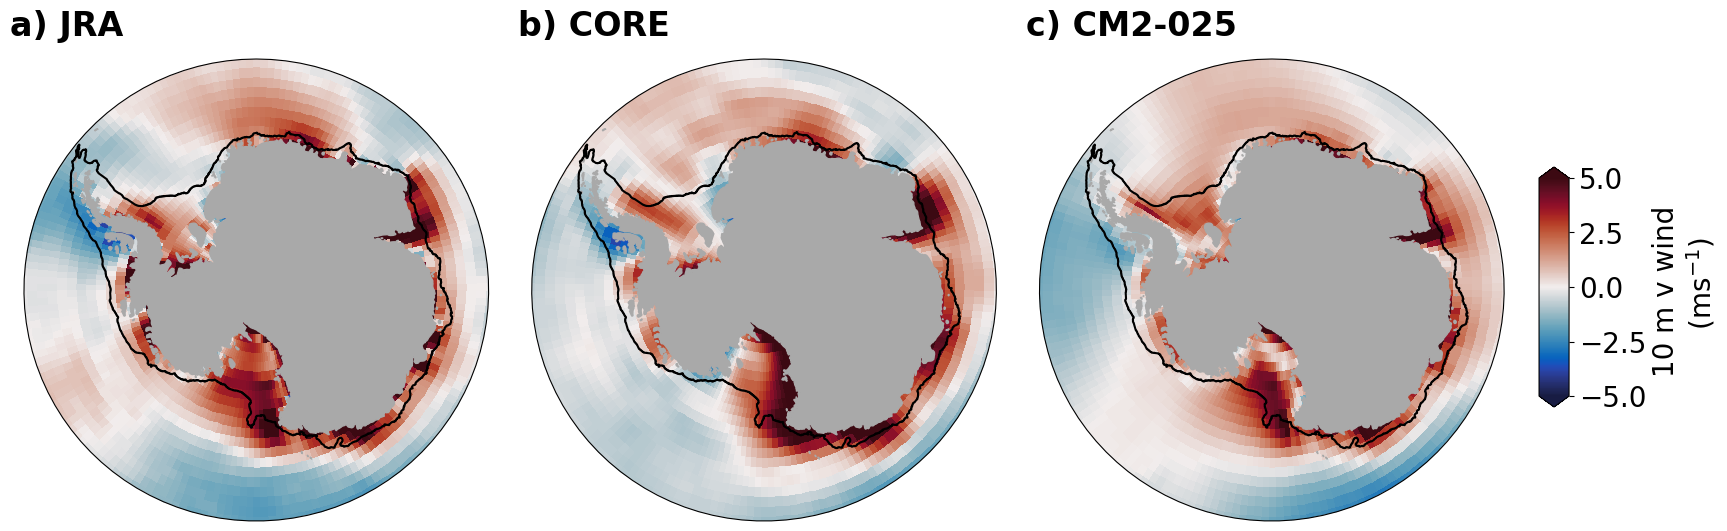

In [101]:
fig = plt.figure(figsize=(20, 6))
gr  = gs.GridSpec(1, 3, figure=fig, wspace=-.05, hspace=0.15); 
axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,2], projection = ccrs.SouthPolarStereo())]
for ax, lb in zip(axs, ['a) JRA', 'b) CORE', 'c) CM2-025']):
    ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
    ax.spines['geo']
    ax.text(-0.03, 1.05, lb, transform=ax.transAxes, size=24, weight='bold')
    ax.patch.set_alpha(0)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())

axs[0].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], v_JRA_interp, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-5, vmax=5, zorder=0)
axs[1].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], v_nyf_interp, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-5, vmax=5, zorder=0)
c = axs[2].pcolormesh(lon_CM2_025, wind_speed_JRA_interp['lat'], v_CM2_025_int, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-5, vmax=5, zorder=0)

cbar_ax  = fig.add_axes([0.9, 0.3, 0.015, 0.4])
cbar = plt.colorbar(c, cax=cbar_ax, label='10 m v wind \n (ms$^{-1}$)', extend='both', ticks=np.arange(-5,6,2.5)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_v_wind_products_SO_CORE_comparison.png'
    plt.savefig(fig_path + fig_name, dpi=300);